## Part 1 - SQL
SQL dialect: PostgreSQL

### Question 1
~~~mysql
WITH customers_products AS (
    SELECT c.id, 
           o.product_id, 
           COUNT(*) AS count
    FROM customers AS c
    LEFT JOIN orders AS o ON o.customer_id = c.id
    GROUP BY c.id, 
             o.product_id
)
SELECT c.id                  AS "Customer ID", 
       p.name                AS "Product Names",
       COALESCE(cp.count, 0) AS "Order Count"
FROM customers AS c
CROSS JOIN products AS p
LEFT JOIN customers_products AS cp ON cp.id = c.id AND cp.product_id = p.id
~~~

### Question 2
~~~mysql
SELECT DISTINCT c.first_name || ' ' || c.last_name AS "Customer Full Name",
       LAST_VALUE(o.id) OVER (ORDER BY o.date ASC) AS "Order ID"
FROM customers AS c
LEFT JOIN orders AS o ON o.customer_id = c.id
~~~

### Question 3
~~~mysql
WITH orders_values AS (
    SELECT o.id          AS order_id, 
           o.customer_id AS customer_id,
           SUM(p.price)  AS order_value
    FROM orders AS o
    LEFT JOIN products AS p ON p.id = o.product_id
    GROUP BY o.id, 
             o.customer_id
)
SELECT ov.customer_id      AS "Customer ID",
       AVG(ov.order_value) AS "Average Order Amount"
FROM orders_values AS ov
GROUP BY ov.customer_id
HAVING AVG(ov.order_value) > 100
~~~

## Part 2 - Visualization

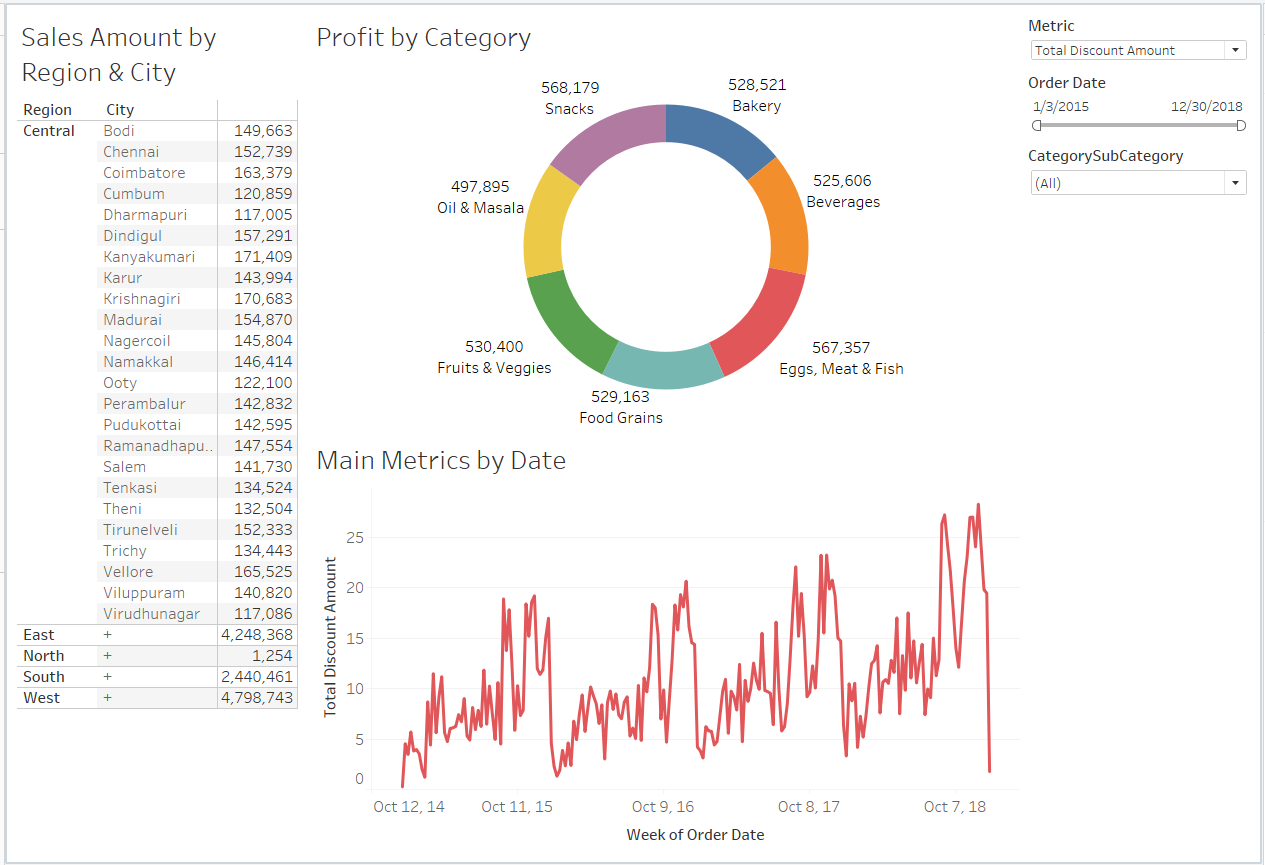

## Part 3 - Business Performance Evaluation

In [25]:
import pandas as pd
from scipy.stats import chi2_contingency

In [4]:
campaign_a = {
    "budget_spent":100,
    "unique_views":1000,
    "unique_purchasers":20,
    "total_revenue":180,
    "std":20
}

campaign_b = {
    "budget_spent":100,
    "unique_views":1000,
    "unique_purchasers":10,
    "total_revenue":300,
    "std":1
}

### Question 1 + 2

$$\text{CPA} = \frac{\text{Budget Spent}}{\text{Unique Purchasers}}$$

$$\text{ROMI} = \frac{\text{Total Revenue} - \text{Budget Spent}}{\text{Budget Spent}}$$

$$\text{ROAS} = \frac{\text{Total Revenue}}{\text{Budget Spent}}$$

$$\text{CR} = \frac{\text{Unique Purchasers}}{\text{Unique Views}}$$

In [19]:
data = [[campaign_a["budget_spent"] / campaign_a["unique_purchasers"], 
         campaign_b["budget_spent"] / campaign_b["unique_purchasers"]],
        [(campaign_a["total_revenue"] - campaign_a["budget_spent"]) / campaign_a["budget_spent"], 
         (campaign_b["total_revenue"] - campaign_b["budget_spent"]) / campaign_b["budget_spent"]],
        [campaign_a["total_revenue"] / campaign_a["budget_spent"], 
         campaign_b["total_revenue"] / campaign_b["budget_spent"]], 
        [campaign_a["unique_purchasers"] / campaign_a["unique_views"],
         campaign_b["unique_purchasers"] / campaign_b["unique_views"]]]

In [21]:
display(pd.DataFrame(index=['CPA, $', 'ROMI', 'ROAS', 'CR'], columns=['Campaign A', 'Campaign B'], data=data))

,Campaign A,Campaign B
"CPA, $",5.00,10.00
ROMI,0.80,2.00
ROAS,1.80,3.00
CR,0.02,0.01


In order to determine whether the difference id CR is statistically significant or not we will conduct chi square test 

In [29]:
p_value = chi2_contingency([[campaign_a["unique_views"], campaign_a["unique_purchasers"]], 
                  [campaign_b["unique_views"], campaign_b["unique_purchasers"]]])[1]
print(f"p-value = {p_value}")

p-value = 0.10346504043935585


P-value is greater than 0.05 so we cannot state that Campaign A CR significantly differs from Campaign B CR

### Question 3

The main reason why we cannot compare revenue per purchaser is that we don't have the initial data. We cannot analyse the distribution of the initial data, so we cannot conduct any statistical test. And even if we assume our data to be normally distributed we have following issues:
- small sizes of samples 
- different sizes of samples
- different std 

So, we cannot say that revenue per purchaser in one campaign will be potentially higher than in another one